In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression
from sklearn.decomposition import PCA

dosya_adi = "gold_data.xlsx"

try:
    df = pd.read_excel(dosya_adi)
    
    print("Veri başarıyla yüklendi. İlk 5 satır:")
    print(df.head())

except ImportError:
    print("Hata kütüphane kurulu değil.")

Veri başarıyla yüklendi. İlk 5 satır:
                 Date         Open         High          Low        Close  \
0 2022-01-01 00:00:00  1561.810178  2450.057992   998.952029  1837.279514   
1 2022-01-01 01:00:00  2426.071460  1607.806820  1897.256866  1527.707818   
2 2022-01-01 02:00:00  2097.990913  1734.993509  2410.043079  1131.575493   
3 2022-01-01 03:00:00  1897.987726  1653.443168  2107.058378  1153.447534   
4 2022-01-01 04:00:00  1234.027961  1434.847886  1331.613890  1282.767421   

   Volume  USD_Index  Oil_Price        SP500  Inflation_Rate  Interest_Rate  \
0  630597  82.958541  93.286275  3385.795570        5.675399       0.357507   
1  945060  92.464259  98.534174  2963.477591        6.071568      14.329028   
2  312580  95.306958  87.049872  2633.452643        0.944284      13.770735   
3  722435  99.467653  71.931234  2223.525085        8.012654       2.177062   
4  312212  96.263351  50.334322  2468.735231        5.957010      13.045183   

   Exchange_Rate  Silver

In [4]:
df.set_index('Date', inplace=True)

print("Date sütunu başarıyla indeks yapıldı.")
print("Güncel İndeks Tipi:", df.index.dtype)
print("İlk 5 kayıt:")
print(df.head())

Date sütunu başarıyla indeks yapıldı.
Güncel İndeks Tipi: datetime64[ns]
İlk 5 kayıt:
                            Open         High          Low        Close  \
Date                                                                      
2022-01-01 00:00:00  1561.810178  2450.057992   998.952029  1837.279514   
2022-01-01 01:00:00  2426.071460  1607.806820  1897.256866  1527.707818   
2022-01-01 02:00:00  2097.990913  1734.993509  2410.043079  1131.575493   
2022-01-01 03:00:00  1897.987726  1653.443168  2107.058378  1153.447534   
2022-01-01 04:00:00  1234.027961  1434.847886  1331.613890  1282.767421   

                     Volume  USD_Index  Oil_Price        SP500  \
Date                                                             
2022-01-01 00:00:00  630597  82.958541  93.286275  3385.795570   
2022-01-01 01:00:00  945060  92.464259  98.534174  2963.477591   
2022-01-01 02:00:00  312580  95.306958  87.049872  2633.452643   
2022-01-01 03:00:00  722435  99.467653  71.931234  2223.52

In [5]:
# --- GECİKMELİ (LAG) ÖZELLİKLER ---

lag_sutunlari = ['Predicted_Close', 'Volume']
gecikmeler = [1, 2, 6] # 1 saat, 2 saat ve 6 saat önceki değerler

for sutun in lag_sutunlari:
    for gecikme in gecikmeler:
        yeni_ad = f'{sutun}_Lag_{gecikme}h'
        # shift() geçmiş değeri getirir
        df[yeni_ad] = df[sutun].shift(gecikme)

print("Lag Özellikleri başarıyla eklendi.")
print("Lag Özellikli İlk 5 Kayıt:")
print(df.head())

Lag Özellikleri başarıyla eklendi.
Lag Özellikli İlk 5 Kayıt:
                            Open         High          Low        Close  \
Date                                                                      
2022-01-01 00:00:00  1561.810178  2450.057992   998.952029  1837.279514   
2022-01-01 01:00:00  2426.071460  1607.806820  1897.256866  1527.707818   
2022-01-01 02:00:00  2097.990913  1734.993509  2410.043079  1131.575493   
2022-01-01 03:00:00  1897.987726  1653.443168  2107.058378  1153.447534   
2022-01-01 04:00:00  1234.027961  1434.847886  1331.613890  1282.767421   

                     Volume  USD_Index  Oil_Price        SP500  \
Date                                                             
2022-01-01 00:00:00  630597  82.958541  93.286275  3385.795570   
2022-01-01 01:00:00  945060  92.464259  98.534174  2963.477591   
2022-01-01 02:00:00  312580  95.306958  87.049872  2633.452643   
2022-01-01 03:00:00  722435  99.467653  71.931234  2223.525085   
2022-01-01 04:00

In [6]:
# --- HAREKETLİ PENCERE (ROLLING) ÖZELLİKLER ---

rolling_sutunlari = ['Predicted_Close', 'Volume', 'Bitcoin_Price']
pencere_boyutlari = [24, 72] 

for sutun in rolling_sutunlari:
    for pencere in pencere_boyutlari:
        # Hareketli Ortalama
        df[f'{sutun}_MA_{pencere}h'] = df[sutun].rolling(window=pencere).mean()
        # Hareketli Standart Sapma
        df[f'{sutun}_Std_{pencere}h'] = df[sutun].rolling(window=pencere).std()

print("Hareketli Pencere (Rolling) Özellikleri başarıyla eklendi.")
print("Rolling Özellikli Son 5 Kayıt:")
print(df.tail())

Hareketli Pencere (Rolling) Özellikleri başarıyla eklendi.
Rolling Özellikli Son 5 Kayıt:
                            Open         High          Low        Close  \
Date                                                                      
2024-12-30 19:00:00  1599.513836  2279.698225  1557.960973  2208.986128   
2024-12-30 20:00:00  2082.714694  1243.427776  2208.644024  1052.394990   
2024-12-30 21:00:00  2429.506233  2093.967841  1771.271481  1643.801273   
2024-12-30 22:00:00  2130.337877  1105.799332  1246.093082  2303.046514   
2024-12-30 23:00:00  1269.172994  1012.322628  2018.355886  1054.561510   

                     Volume   USD_Index  Oil_Price        SP500  \
Date                                                              
2024-12-30 19:00:00  227528   91.331855  38.587826  2807.191315   
2024-12-30 20:00:00  660457   93.283068  36.821454  4562.058035   
2024-12-30 21:00:00   62571  106.253701  69.784637  4895.358193   
2024-12-30 22:00:00  892776  101.882739  67.43139

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# --- NaN Satırları Temizleme ---
# Lag ve Rolling özelliklerinden dolayı oluşan NaN satırları düşür.
df.dropna(inplace=True)

print("\n--- Final Veri Boyutu Kontrolü ---")
print(f"Yeni Kayıt Sayısı (NaN Atıldıktan Sonra): {len(df)} kayıt")


# --- X (Özellikler) ve y (Hedef) Ayırma ve Eğitim/Test Bölme ---

# Predicted_Close hedef değişkenimiz
y = df['Predicted_Close'] 
# Predicted_Close haricindeki tüm sütunlar X
X = df.drop('Predicted_Close', axis=1) 

# Veriyi sıralı olarak %80/%20 oranında ayırma
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\n Veriler Eğitim ve Test Setlerine Ayrıldı.")
print(f"Eğitim Veri Seti Boyutu (80%): {len(X_train)} kayıt")
print(f"Test Veri Seti Boyutu (20%): {len(X_test)} kayıt")


# --- Standardizasyon (Ölçeklendirme) ---
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n Standardizasyon Başarıyla Uygulandı.")
print("X_train_scaled ilk 3 satır (Standardize Edilmiş Değerler):")
print(X_train_scaled.head(3))


--- Final Veri Boyutu Kontrolü ---
Yeni Kayıt Sayısı (NaN Atıldıktan Sonra): 26209 kayıt

 Veriler Eğitim ve Test Setlerine Ayrıldı.
Eğitim Veri Seti Boyutu (80%): 20967 kayıt
Test Veri Seti Boyutu (20%): 5242 kayıt

 Standardizasyon Başarıyla Uygulandı.
X_train_scaled ilk 3 satır (Standardize Edilmiş Değerler):
                         Open      High       Low     Close    Volume  \
Date                                                                    
2022-01-03 23:00:00 -1.044720  0.232880  1.355362 -1.516293  1.285464   
2022-01-04 00:00:00 -1.714552 -0.368936  1.167727  0.554868 -0.648721   
2022-01-04 01:00:00  1.093631  0.466650  1.609915  0.054344 -1.091763   

                     USD_Index  Oil_Price     SP500  Inflation_Rate  \
Date                                                                  
2022-01-03 23:00:00   1.611401   1.184942  0.731989        0.743225   
2022-01-04 00:00:00  -1.641066  -1.370156 -0.293058       -1.114467   
2022-01-04 01:00:00  -0.784119  -0.

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error 

# XGBoost Regressor modelini tanımlıyoruz
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regresyon görevleri için en uygun kayıp fonksiyonu (MSE)
    n_estimators=1000,             # Kullanılacak ağaç sayısı
    learning_rate=0.05,            # Öğrenme hızı
    random_state=42,               # Tekrarlanabilir sonuçlar için
    n_jobs=-1                      # Tüm CPU çekirdeklerini kullan
)

print("XGBoost Modeli Eğitiliyor...")

xgb_model.fit(X_train_scaled, y_train)

print("Model Eğitimi Tamamlandı.")

XGBoost Modeli Eğitiliyor...
Model Eğitimi Tamamlandı.


In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Sonuçları depolamak için boş bir DataFrame oluşturuluyor
df_results = pd.DataFrame(columns=['Model', 'Feature_Selection_Method', 'RMSE', 'R2_Score'])

# Model değerlendirme ve sonuç kaydı için yardımcı fonksiyon
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_method):
    print(f"--- {model_name} Eğitiliyor... ---")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Skoru: {r2:.4f}\n")
    
    global df_results
    new_row = pd.DataFrame([{'Model': model_name, 'Feature_Selection_Method': feature_method, 'RMSE': rmse, 'R2_Score': r2}])
    df_results = pd.concat([df_results, new_row], ignore_index=True)
    
    return model

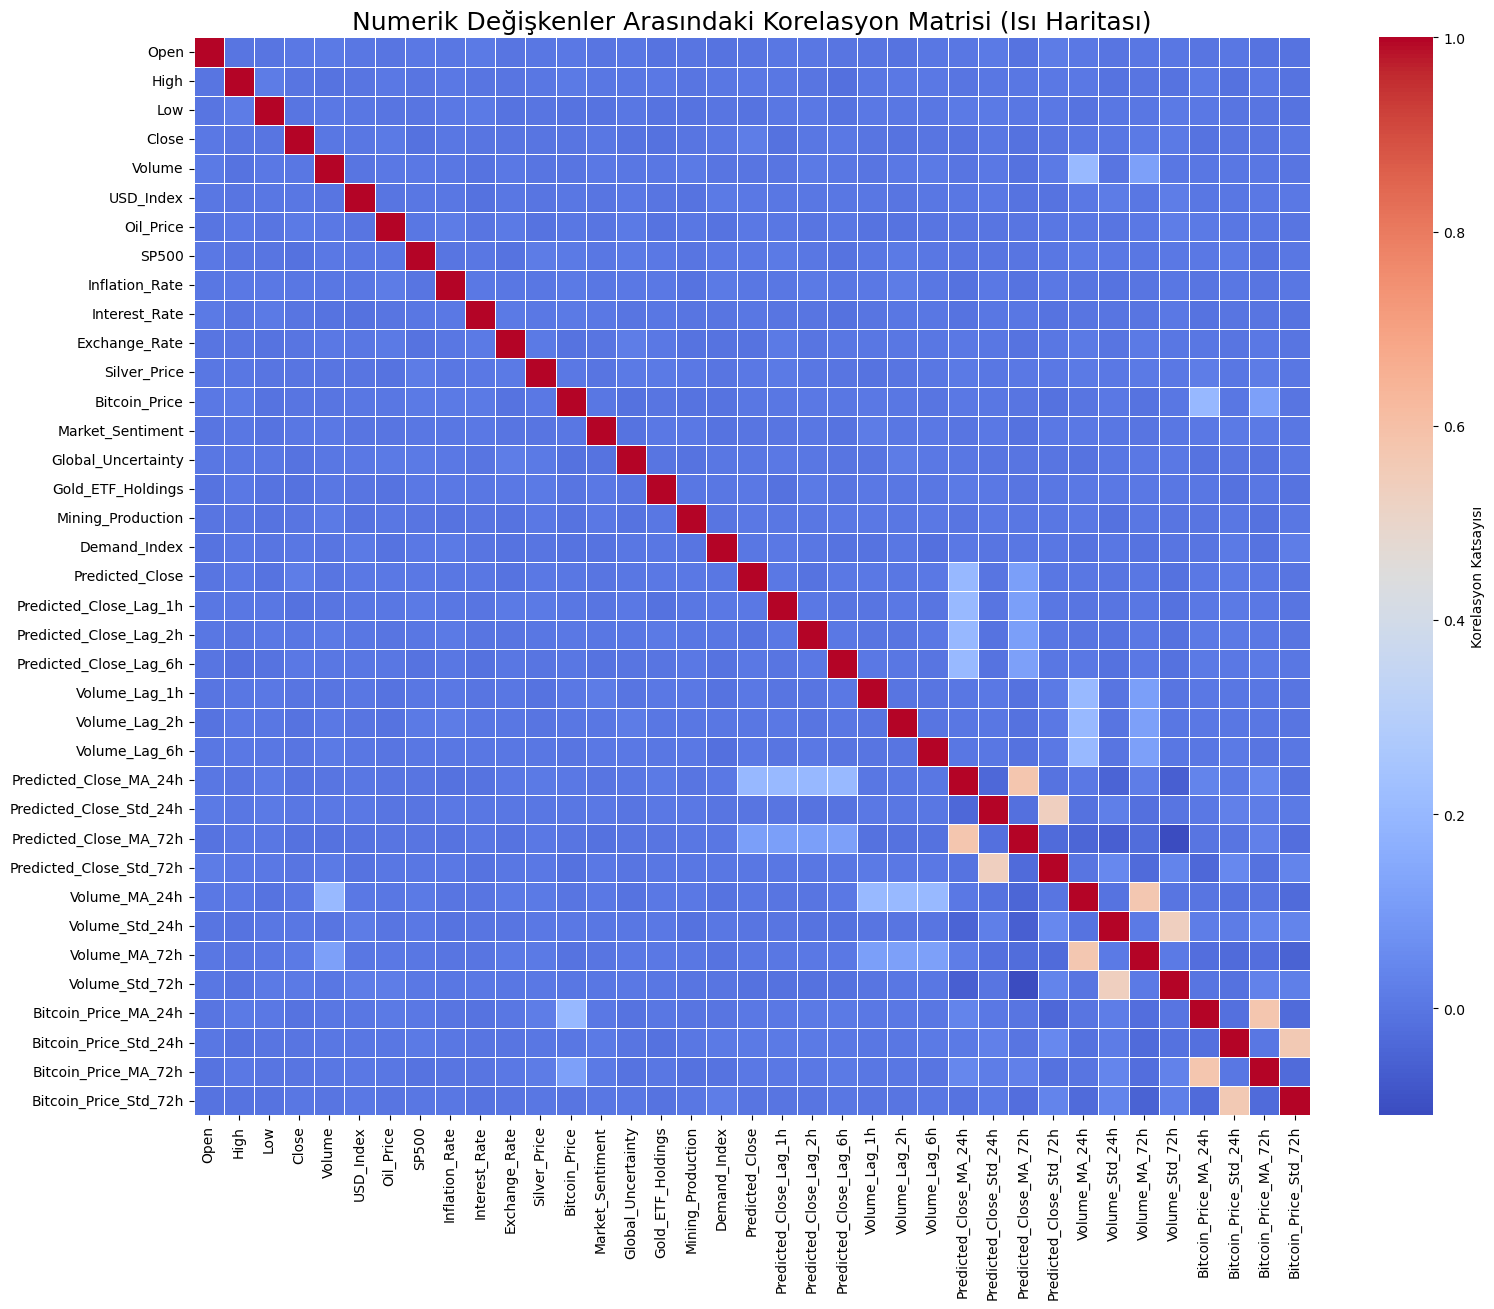

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## KORELASYON MATRİSİ GRAFİĞİ (Isı Haritası)

# Numerik değişkenler arasındaki korelasyonu hesapla
# df.select_dtypes(include=np.number) ile sadece sayısal sütunları seçiyoruz.
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Isı Haritasını çiz
plt.figure(figsize=(18, 14)) # Rapor için büyük boyut
sns.heatmap(
    correlation_matrix, 
    annot=False, # Yüksek sütun sayısı nedeniyle değerleri göstermiyoruz
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Korelasyon Katsayısı'}
)

plt.title('Numerik Değişkenler Arasındaki Korelasyon Matrisi (Isı Haritası)', fontsize=18)
plt.show()

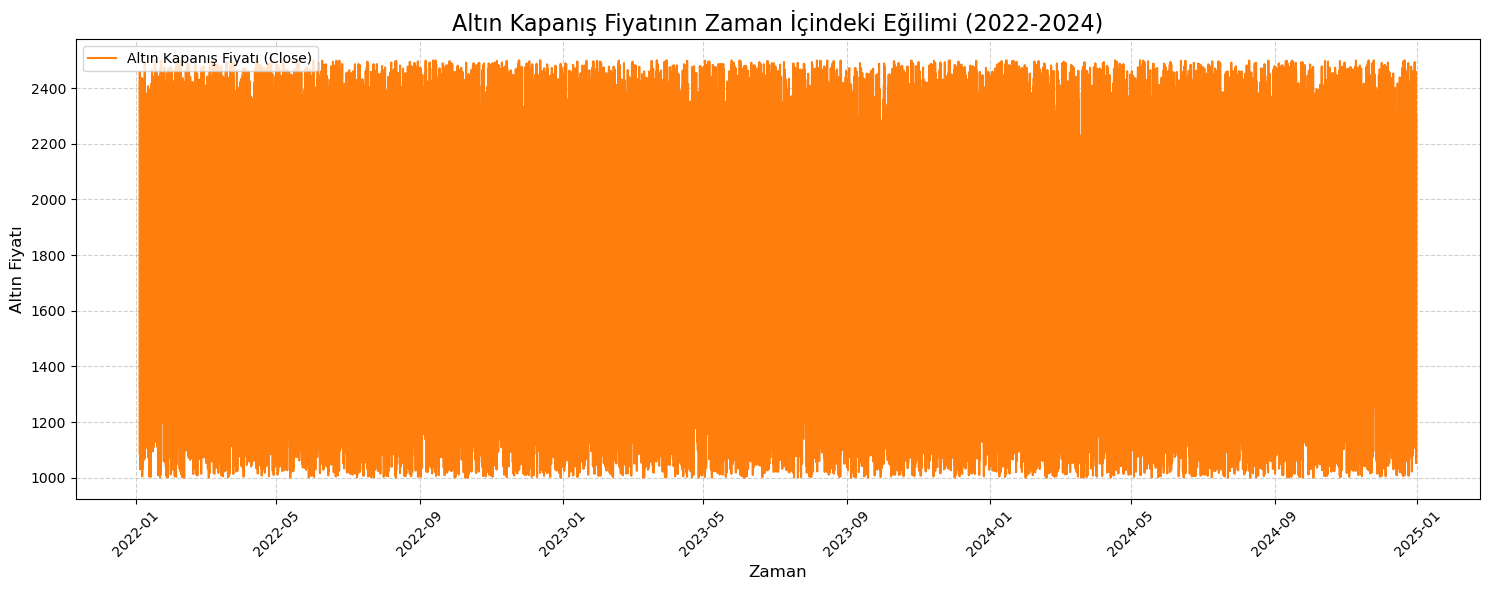

In [11]:
plt.figure(figsize=(15, 6))

if 'Date' in df.columns:
    df_temp = df.set_index('Date')
else:
    df_temp = df.copy()

plt.plot(df_temp.index, df_temp['Close'], label='Altın Kapanış Fiyatı (Close)', color='#ff7f0e', linewidth=1.5)

plt.title('Altın Kapanış Fiyatının Zaman İçindeki Eğilimi (2022-2024)', fontsize=16)
plt.xlabel('Zaman', fontsize=12)
plt.ylabel('Altın Fiyatı', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

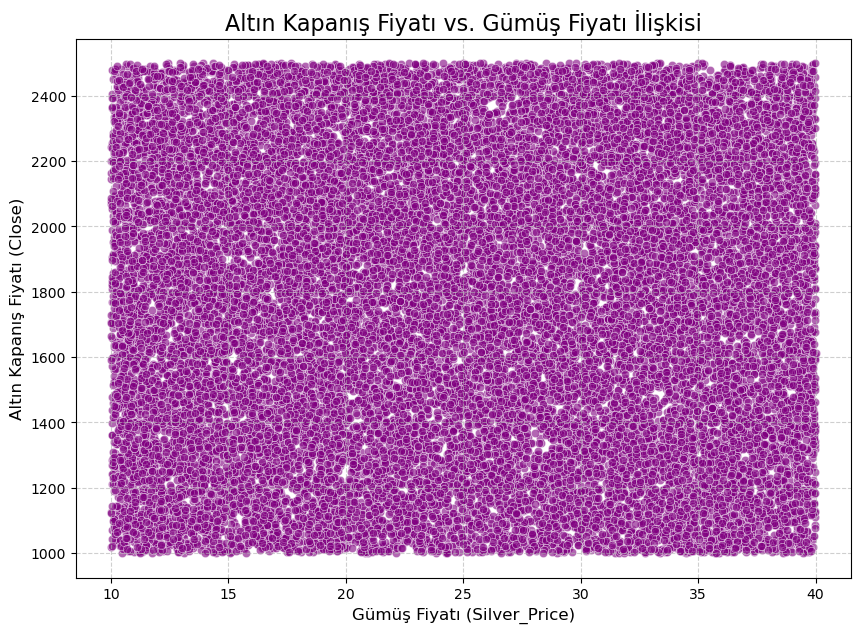

In [12]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=df['Silver_Price'], y=df['Close'], color='purple', alpha=0.6)

plt.title('Altın Kapanış Fiyatı vs. Gümüş Fiyatı İlişkisi', fontsize=16)
plt.xlabel('Gümüş Fiyatı (Silver_Price)', fontsize=12)
plt.ylabel('Altın Kapanış Fiyatı (Close)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

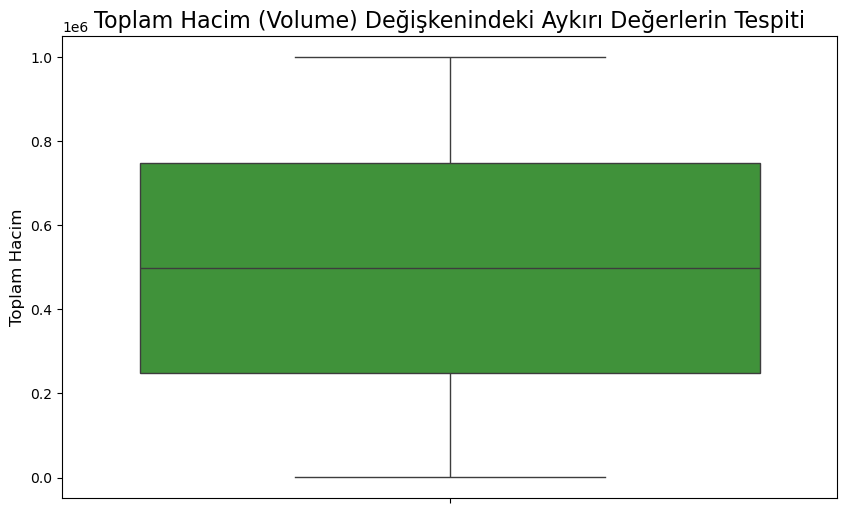

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(y=df['Volume'], color='#33a02c')

plt.title('Toplam Hacim (Volume) Değişkenindeki Aykırı Değerlerin Tespiti', fontsize=16)
plt.ylabel('Toplam Hacim', fontsize=12)
plt.show()

In [14]:
# ASFANDIYOR FARKHADOV: Korelasyon, Linear Regression ve Decision Tree

temp_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
temp_df['target'] = y_train.values

correlations = temp_df.corr()['target'].abs().sort_values(ascending=False)
top_features_corr = correlations[1:16].index.tolist()

X_train_corr = X_train_scaled[top_features_corr]
X_test_corr = X_test_scaled[top_features_corr]

print(f"Korelasyon tabanlı seçilen 15 özellik: {top_features_corr}")

lr_model = LinearRegression()
lr_model = evaluate_model(lr_model, X_train_corr, X_test_corr, y_train, y_test, 
                          model_name="Linear Regression", feature_method="Correlation")

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model = evaluate_model(dt_model, X_train_corr, X_test_corr, y_train, y_test, 
                          model_name="Decision Tree Regressor", feature_method="Correlation")

Korelasyon tabanlı seçilen 15 özellik: ['Predicted_Close_MA_24h', 'Predicted_Close_MA_72h', 'Close', 'Predicted_Close_Lag_2h', 'Volume_Std_72h', 'Silver_Price', 'Low', 'Exchange_Rate', 'SP500', 'Bitcoin_Price_Std_72h', 'Market_Sentiment', 'Bitcoin_Price_Std_24h', 'Oil_Price', 'USD_Index', 'Predicted_Close_Lag_1h']
--- Linear Regression Eğitiliyor... ---
RMSE: 423.9127
R2 Skoru: 0.0453

--- Decision Tree Regressor Eğitiliyor... ---


C:\Users\Ghost\AppData\Local\Temp\ipykernel_11816\618804132.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_row], ignore_index=True)


RMSE: 448.7207
R2 Skoru: -0.0697

